# Predicting Water Index in India

Let's predict the water index. This will help India take necessary measures to prevent water scarcity and optimize water allocation for sustainable water management.

## Models to be Trained

In this Kaggle Notebook, I will train the following models to solve this regression problem:

1. **Linear Regression**
2. **Lasso** (Linear Regression with L1 Regularization)
3. **Ridge** (Linear Regression with L2 Regularization)
4. **Elastic Net**
5. **Support Vector Regression**
6. **Random Forest Regressor**
7. **XGBoost**
8. **LSTM**

## Evaluation Metrics

Following with hyperparameter tuning, we will judge model's testing and training performance based on the following metrics:

- **Mean Squared Error (MSE)**
- **Mean Absolute Error (MAE)**
- **R² Score**


Here I will follow this flow to solve this problem
## Data Cleaning -> Data Visualization -> Data Preprocessing -> Model Training -> Exporting Model -> Conclusion

## Let's Import the necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import math
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np

2024-07-30 10:16:09.681845: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-30 10:16:09.681984: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-30 10:16:09.827881: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Let's Go through the Dataset

In [2]:
df = pd.read_csv("/kaggle/input/india-state-level-water-stress-index-dataset/Water Stress2.csv")
df.head()

State Name State area   ( Km^2)  Year State Population  \
0  Andhra Pradesh              162,975  2023      101,024,395   
1  Andhra Pradesh              162,975  2022         99734221   
2  Andhra Pradesh              162,975  2021         98449661   
3  Andhra Pradesh              162,975  2020         97170395   
4  Andhra Pradesh              162,975  2019         95896435   

  Total Water Storage in Reservoirs(mcm)  Groundwater Level(mbgl)  \
0                                  8,021                    11.07   
1                                  7,539                    10.97   
2                                  7,742                     7.57   
3                                  7,911                     6.81   
4                                  7,451                    11.20   

   Total Water Demand(BCM) Rain Water(mm)  Population Density(per Km^2)  \
0                     49.0          151.5                    619.876638   
1                     48.5          575.5                    611.960245   
2                     48.0         1095.7                    604.078300   
3                     47.5          370.3                    596.228839   
4                     47.0          790.7                    588.411934   

   Water Stress Index  
0            9.952877  
1            8.622313  
2            8.717334  
3            8.364753  
4            9.092267

In [3]:
df.describe()

Year  Groundwater Level(mbgl)  Total Water Demand(BCM)  \
count   504.000000               504.000000               504.000000   
mean   2016.500000                 8.474975                17.834603   
std       4.035134                 7.641005                19.726101   
min    2010.000000                 0.400000                 0.040000   
25%    2013.000000                 4.340000                 1.477500   
50%    2016.500000                 6.030000                 9.700000   
75%    2020.000000                 9.935000                30.925000   
max    2023.000000                60.490000                79.800000   

       Population Density(per Km^2)  Water Stress Index  
count                    504.000000          504.000000  
mean                    1333.923233            3.878838  
std                     3331.950335            4.133781  
min                       13.111162            0.017806  
25%                      188.778590            0.534972  
50%                      368.460298            2.224460  
75%                      859.191030            6.784195  
max                    22197.439350           18.999209

# Data Cleaning 

In [4]:
df.isnull().sum()

State Name                                0
State area   ( Km^2)                      0
Year                                      0
State Population                          0
Total Water Storage in Reservoirs(mcm)    0
Groundwater Level(mbgl)                   0
Total Water Demand(BCM)                   0
Rain Water(mm)                            1
Population Density(per Km^2)              0
Water Stress Index                        0
dtype: int64

In [5]:
# Some of the data got comma(,), we have to clean this
cols = df.columns
for col in cols:
    try:
        df[col] = df[col].str.replace(',', '').astype(float)
    except:
        pass
    
#  We got one column with empty cell, Let's solve that
med = df['Rain Water(mm)'].median()
med = math.floor(med)
df['Rain Water(mm)'] = df['Rain Water(mm)'].fillna(med)

# Data Visualiation

# Data Preprocessing

## Step 1: We will first encode the State Name column using Label Encoder
Though One Hot Encoding can also be used, but it will increase Dataset Dimensionality though
So I am avoiding it to save time as I will do Hyperparameter tuning

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [7]:
df['State Name'] = le.fit_transform(df['State Name'])
df

State Name  State area   ( Km^2)  Year  State Population  \
0             1              162975.0  2023       101024395.0   
1             1              162975.0  2022        99734221.0   
2             1              162975.0  2021        98449661.0   
3             1              162975.0  2020        97170395.0   
4             1              162975.0  2019        95896435.0   
..          ...                   ...   ...               ...   
499          26                 294.0  2014          696324.0   
500          26                 294.0  2013          680979.0   
501          26                 294.0  2012          665634.0   
502          26                 294.0  2011          650289.0   
503          26                 294.0  2010          650289.0   

     Total Water Storage in Reservoirs(mcm)  Groundwater Level(mbgl)  \
0                                   8021.00                    11.07   
1                                   7539.00                    10.97   
2                                   7742.00                     7.57   
3                                   7911.00                     6.81   
4                                   7451.00                    11.20   
..                                      ...                      ...   
499                                  141.89                    17.21   
500                                  134.41                     8.96   
501                                  139.41                     3.17   
502                                  134.91                     4.65   
503                                  129.11                     2.48   

     Total Water Demand(BCM)  Rain Water(mm)  Population Density(per Km^2)  \
0                      49.00      151.500000                    619.876638   
1                      48.50      575.500000                    611.960245   
2                      48.00     1095.700000                    604.078300   
3                      47.50      370.300000                    596.228839   
4                      47.00      790.700000                    588.411934   
..                       ...             ...                           ...   
499                     0.87     1330.000000                   2368.448980   
500                     0.86     1298.100000                   2316.255102   
501                     0.86     1266.400000                   2264.061224   
502                     0.85     1234.776364                   2211.867347   
503                     0.85     1203.107273                   2211.867347   

     Water Stress Index  
0              9.952877  
1              8.622313  
2              8.717334  
3              8.364753  
4              9.092267  
..                  ...  
499            2.594037  
500            2.003621  
501            0.252567  
502            0.251834  
503            0.240334  

[504 rows x 10 columns]

In [8]:
df['State Name'].unique()

array([ 1,  2,  3,  4,  6,  9, 10, 11, 12, 13, 15, 16, 17, 20, 19, 21, 22,
       23, 24, 25, 27, 28, 29, 30, 32, 31, 33, 34, 35,  0,  5,  7,  8, 14,
       18, 26])

## Step 2: Let's now standardize the data using Min-Max Scaling

In [9]:
scaler = MinMaxScaler()
cols = df.columns

for col in cols:
    try:
        df[col] = df[col].str.replace(',', '').astype(float)
    except:
        pass
for col in cols:
    try:
#         df[col] = df[col].str.replace(',', '').astype(float)
        scaler.fit(df[[col]])
        df[col] = scaler.transform(df[[col]])
    except:
        print("got error in ",col)
df

State Name  State area   ( Km^2)      Year  State Population  \
0      0.028571              0.476153  1.000000          0.454715   
1      0.028571              0.476153  0.923077          0.448904   
2      0.028571              0.476153  0.846154          0.443118   
3      0.028571              0.476153  0.769231          0.437356   
4      0.028571              0.476153  0.692308          0.431619   
..          ...                   ...       ...               ...   
499    0.742857              0.000766  0.307692          0.002846   
500    0.742857              0.000766  0.230769          0.002777   
501    0.742857              0.000766  0.153846          0.002708   
502    0.742857              0.000766  0.076923          0.002638   
503    0.742857              0.000766  0.000000          0.002638   

     Total Water Storage in Reservoirs(mcm)  Groundwater Level(mbgl)  \
0                                  0.127063                 0.177567   
1                                  0.119422                 0.175903   
2                                  0.122640                 0.119321   
3                                  0.125319                 0.106673   
4                                  0.118027                 0.179730   
..                                      ...                      ...   
499                                0.002163                 0.279747   
500                                0.002045                 0.142453   
501                                0.002124                 0.046098   
502                                0.002053                 0.070727   
503                                0.001961                 0.034615   

     Total Water Demand(BCM)  Rain Water(mm)  Population Density(per Km^2)  \
0                   0.613842        0.011458                      0.027351   
1                   0.607573        0.084075                      0.026994   
2                   0.601304        0.173169                      0.026639   
3                   0.595035        0.048931                      0.026285   
4                   0.588766        0.120932                      0.025933   
..                       ...             ...                           ...   
499                 0.010406        0.213297                      0.106171   
500                 0.010281        0.207834                      0.103819   
501                 0.010281        0.202405                      0.101466   
502                 0.010155        0.196988                      0.099113   
503                 0.010155        0.191565                      0.099113   

     Water Stress Index  
0              0.523411  
1              0.453313  
2              0.458319  
3              0.439743  
4              0.478071  
..                  ...  
499            0.135724  
500            0.104619  
501            0.012368  
502            0.012329  
503            0.011724  

[504 rows x 10 columns]

# Model Training

## Step 1: Let's Split the data into Features and Label
* I will save the "Year" column separately as we will be requiring that while training LSTM.
* For other models the "Year" column is not necessary, So I am going to drop that

In [10]:
year = df['Year']
df = df.drop(columns=["Year"])
y = df['Water Stress Index']
X = df.drop(columns=["Water Stress Index"])

## Step 2: Now We will Split the DAta into Train and Test for Both X and y
I will be taking 20% of the dataset as the Test data

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Model Training
In Model Training we will try out various ML models, along with Hyper Parameter Tuning I will also apply Cross Validation on both test and train

## 1. Linear Regression

In [12]:
lr = GridSearchCV(LinearRegression(),{
    'fit_intercept':[False,True],
#     'normalize':[False,True],
    'copy_X':[False,True],}, cv=5, return_train_score=False)
lr.fit(X_train,y_train)
print("Cross Validation Score for Train",cross_val_score(lr,X_train,y_train).mean())
print("Cross Validation Score for Test",cross_val_score(lr,X_test,y_test).mean())

Cross Validation Score for Train 0.5391753910274918
Cross Validation Score for Test 0.6269991152111282


In [13]:
print("Best Parameters:", lr.best_params_)
print("Best Score:", lr.best_score_)

Best Parameters: {'copy_X': False, 'fit_intercept': False}
Best Score: 0.5503373767893119


Mean Squared Error: 0.015699867796452237
Mean Absolute Error: 0.08570290837869383
R2 Score: 0.6992405506773266


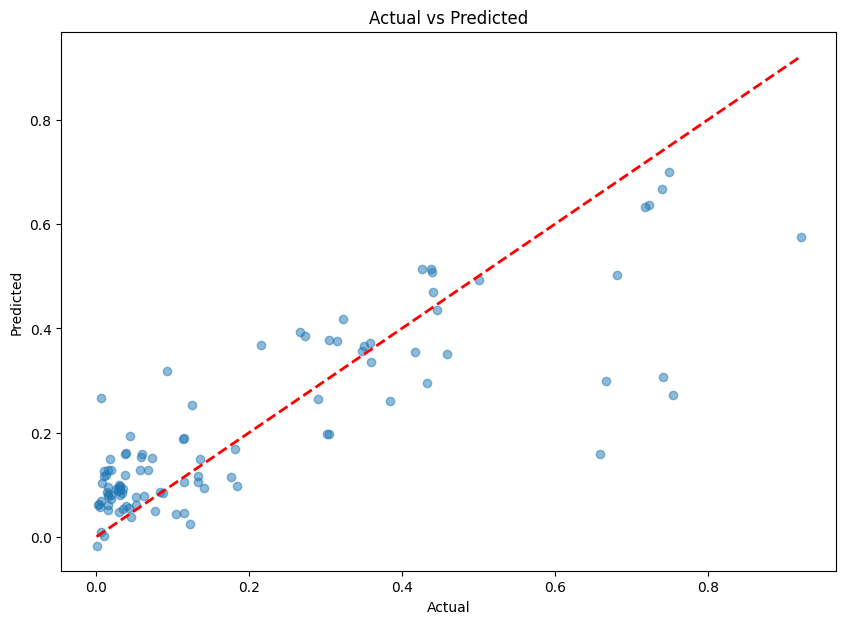

In [14]:
y_predict = lr.predict(X_test)
mse_lr = mean_squared_error(y_test,y_predict)
mae_lr = mean_absolute_error(y_test,y_predict)
r2_lr = r2_score(y_test,y_predict)

print(f"Mean Squared Error:",mse_lr)
print(f"Mean Absolute Error:",mae_lr)
print(f"R2 Score:",r2_lr)

plt.figure(figsize=(10, 7))
plt.scatter(y_test,y_predict,alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--',lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

## 2. Linear Regression with L1 Regularization

In [15]:
lasso = GridSearchCV(Lasso(tol=0.1),{
    'alpha':[i for i in range(1,101)],
    'fit_intercept':[False,True],
    'copy_X':[False,True],
}, cv=5, return_train_score=False)
lasso.fit(X_train,y_train)
print("Cross Validation Score for Train",cross_val_score(lasso,X_train,y_train).mean())
print("Cross Validation Score for Test",cross_val_score(lasso,X_test,y_test).mean())

Cross Validation Score for Train -0.009196950710247486
Cross Validation Score for Test -0.03185921491665389


In [16]:
print("Best Parameters:", lasso.best_params_)
print("Best Score:", lasso.best_score_)

Best Parameters: {'alpha': 1, 'copy_X': False, 'fit_intercept': True}
Best Score: -0.009196950710247486


Mean Squared Error: 0.0524027087884123
Mean Absolute Error: 0.19122395396509947
R2 Score: -0.0038689524367072625


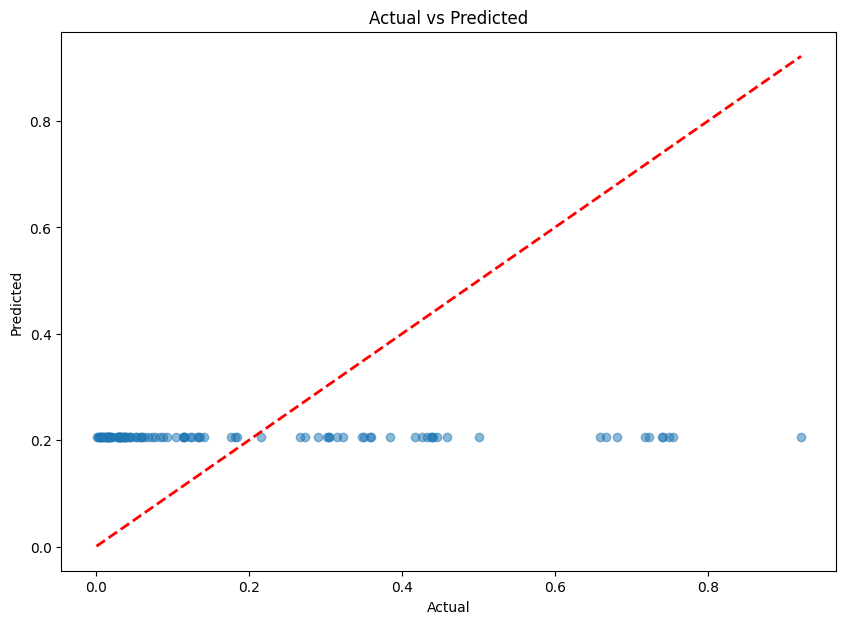

In [17]:
y_predict = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test,y_predict)
mae_lasso = mean_absolute_error(y_test,y_predict)
r2_lasso = r2_score(y_test,y_predict)

print(f"Mean Squared Error:",mse_lasso)
print(f"Mean Absolute Error:",mae_lasso)
print(f"R2 Score:",r2_lasso)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.scatter(y_test,y_predict,alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--',lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

## 3. Linear Regression with L2 Regularization

In [18]:
ridge = GridSearchCV(Ridge(tol=0.1),{
    'alpha':[i for i in range(1,101)],
    'fit_intercept':[False,True],
    'copy_X':[False,True],
}, cv=5, return_train_score=False)
ridge.fit(X_train,y_train)
print("Cross Validation Score for Train",cross_val_score(ridge,X_train,y_train).mean())
print("Cross Validation Score for Test",cross_val_score(ridge,X_test,y_test).mean())

Cross Validation Score for Train 0.5537551699960951
Cross Validation Score for Test 0.5925951301153527


In [19]:
print("Best Parameters:", ridge.best_params_)
print("Best Score:", ridge.best_score_)

Best Parameters: {'alpha': 1, 'copy_X': False, 'fit_intercept': False}
Best Score: 0.5605932168205868


Mean Squared Error: 0.017232700710291718
Mean Absolute Error: 0.0919313106289467
R2 Score: 0.6698763554467012


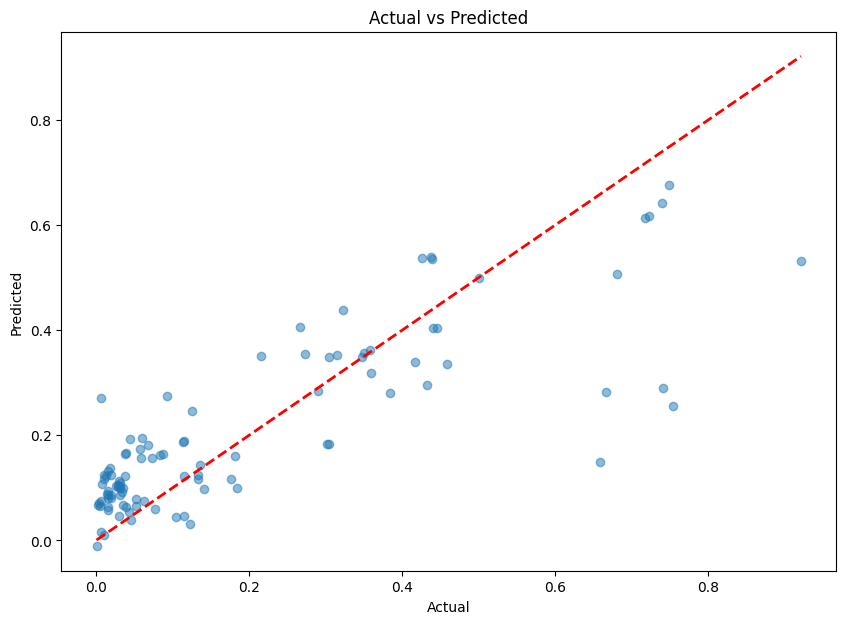

In [20]:
y_predict = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test,y_predict)
mae_ridge = mean_absolute_error(y_test,y_predict)
r2_ridge = r2_score(y_test,y_predict)

print(f"Mean Squared Error:",mse_ridge)
print(f"Mean Absolute Error:",mae_ridge)
print(f"R2 Score:",r2_ridge)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.scatter(y_test,y_predict,alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--',lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

## 4. ElasticNet

In [21]:
elastic = ElasticNet(random_state=0)
elastic.fit(X_train,y_train)
elastic.score(X_test,y_test)

elastic = GridSearchCV(ElasticNet(random_state=0),{
    'alpha': [0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
    'max_iter': [1000, 5000, 10000],
    'tol': [1e-4, 1e-3, 1e-2]}, cv=5, return_train_score=False)
elastic.fit(X_train,y_train)
cross_val_score(elastic,X_train,y_train).mean()
print("Cross Validation Score for Train",cross_val_score(elastic,X_train,y_train).mean())
print("Cross Validation Score for Test",cross_val_score(elastic,X_test,y_test).mean())

Cross Validation Score for Train 0.5423101914863033
Cross Validation Score for Test 0.5821066330901157


In [22]:
print("Best Parameters:", elastic.best_params_)
print("Best Score:", elastic.best_score_)

Best Parameters: {'alpha': 0.01, 'l1_ratio': 0.1, 'max_iter': 1000, 'tol': 0.01}
Best Score: 0.5422362694842737


Mean Squared Error: 0.021196862083744536
Mean Absolute Error: 0.10697939872647323
R2 Score: 0.5939356528138229


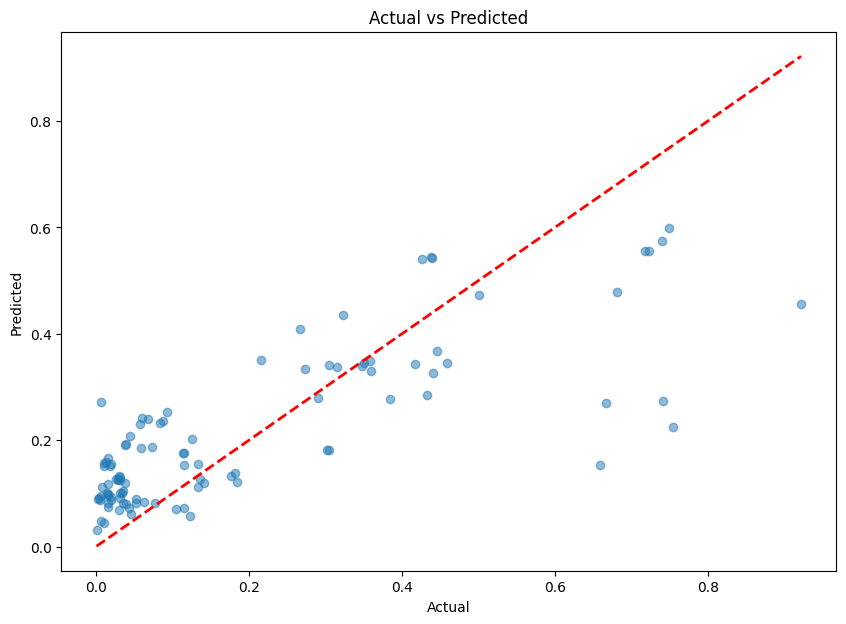

In [23]:
y_predict = elastic.predict(X_test)
mse_elastic = mean_squared_error(y_test,y_predict)
mae_elastic = mean_absolute_error(y_test,y_predict)
r2_elastic = r2_score(y_test,y_predict)

print(f"Mean Squared Error:",mse_elastic)
print(f"Mean Absolute Error:",mae_elastic)
print(f"R2 Score:",r2_elastic)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.scatter(y_test,y_predict,alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--',lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

## 5. Support Vector Regression

In [24]:
svr = GridSearchCV(SVR(),{
    'kernel':['linear','poly','rbf','sigmoid'],
    'gamma':['scale', 'auto'],
}, cv=5, return_train_score=False)
svr.fit(X_train,y_train)
cross_val_score(svr,X_train,y_train).mean()
print("Cross Validation Score for Train",cross_val_score(svr,X_train,y_train).mean())
print("Cross Validation Score for Test",cross_val_score(svr,X_test,y_test).mean())

Cross Validation Score for Train 0.729558927128708
Cross Validation Score for Test 0.6075150864283122


In [25]:
print("Best Parameters:", svr.best_params_)
print("Best Score:", svr.best_score_)

Best Parameters: {'gamma': 'scale', 'kernel': 'rbf'}
Best Score: 0.729558927128708


Mean Squared Error: 0.010641829256125087
Mean Absolute Error: 0.08165335741357319
R2 Score: 0.7961364548826738


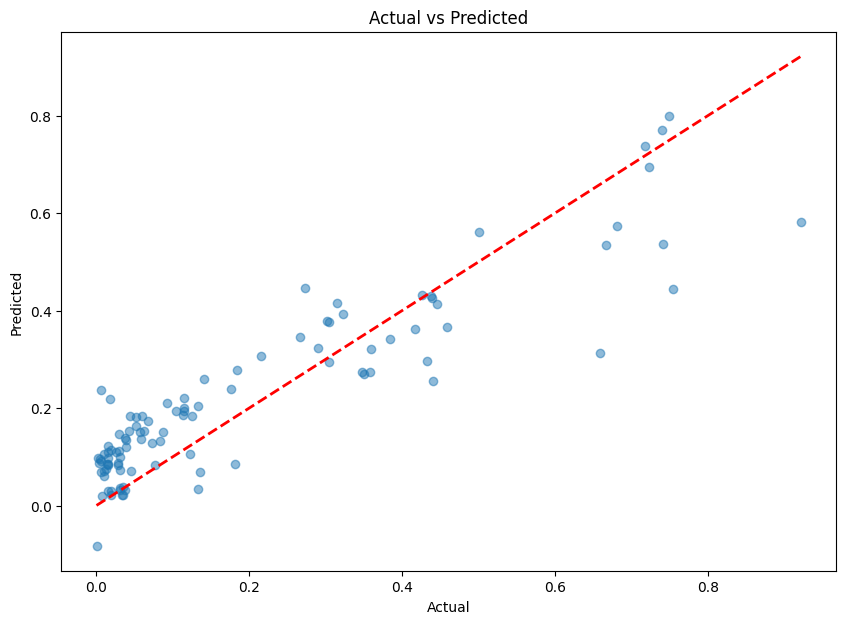

In [26]:
y_predict = svr.predict(X_test)
mse_svr = mean_squared_error(y_test,y_predict)
mae_svr = mean_absolute_error(y_test,y_predict)
r2_svr = r2_score(y_test,y_predict)

print(f"Mean Squared Error:",mse_svr)
print(f"Mean Absolute Error:",mae_svr)
print(f"R2 Score:",r2_svr)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.scatter(y_test,y_predict,alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--',lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

## 6. Random Forest Regressor

In [27]:
start = time.time()
rfr = GridSearchCV(RandomForestRegressor(),{
    'n_estimators':[i for i in range(100,1100,100)],
    'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    
}, cv=5, return_train_score=False)
rfr.fit(X_train,y_train)
print("Cross Validation Score for Train",cross_val_score(rfr,X_train,y_train).mean())
print("Cross Validation Score for Test",cross_val_score(rfr,X_test,y_test).mean())
print("Time Taken :",time.time()-start)

Cross Validation Score for Train 0.9450171208198267
Cross Validation Score for Test 0.6315380105017474
Time Taken : 3326.004932641983


In [28]:
print("Best Parameters:", rfr.best_params_)
print("Best Score:", rfr.best_score_)

Best Parameters: {'criterion': 'poisson', 'n_estimators': 100}
Best Score: 0.9452621543502033


Mean Squared Error: 0.004107282141691873
Mean Absolute Error: 0.026718197601492015
R2 Score: 0.9213175594110897


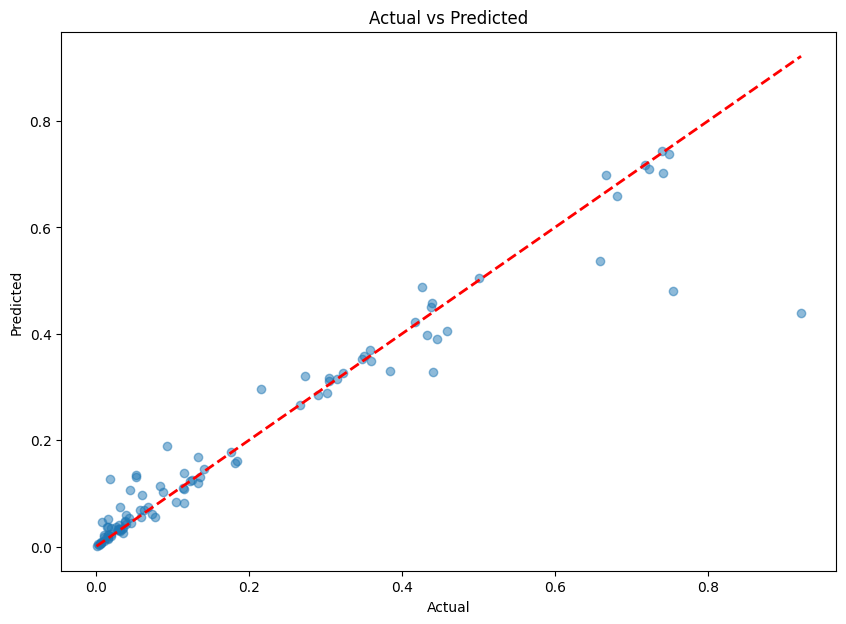

In [29]:
y_predict = rfr.predict(X_test)
mse_rfr = mean_squared_error(y_test,y_predict)
mae_rfr = mean_absolute_error(y_test,y_predict)
r2_rfr = r2_score(y_test,y_predict)

print(f"Mean Squared Error:",mse_rfr)
print(f"Mean Absolute Error:",mae_rfr)
print(f"R2 Score:",r2_rfr)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.scatter(y_test,y_predict,alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--',lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

## 7. XG Boost

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [11:16:50] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [11:16:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "feature_selector" } are not used.

  warnings.warn(smsg, UserWarning)


Test Score 0.8871002452261989
Mean Squared Error: 0.005893451488198781
Mean Absolute Error: 0.03253883157289469
R2 Score: 0.8871002452261989


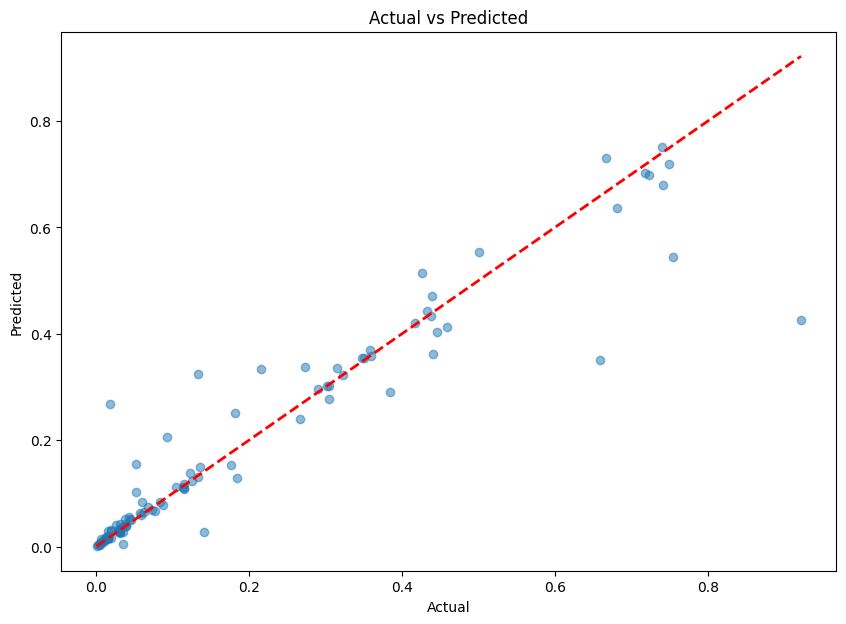

In [30]:
xgb_reg = xgb.XGBRegressor(objective="reg:linear", random_state=42,feature_selector='shuffle')
xgb_reg.fit(X_train, y_train)
# print("Cross Validation Score for Train",cross_val_score(xgb,X_train,y_train).mean())
# print("Cross Validation Score for Test",cross_val_score(xgb,X_test,y_test).mean())

print(f"Test Score",xgb_reg.score(X_test,y_test))

y_predict = xgb_reg.predict(X_test)
mse_xgb = mean_squared_error(y_test,y_predict)
mae_xgb = mean_absolute_error(y_test,y_predict)
r2_xgb = r2_score(y_test,y_predict)

print(f"Mean Squared Error:",mse_xgb)
print(f"Mean Absolute Error:",mae_xgb)
print(f"R2 Score:",r2_xgb)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.scatter(y_test,y_predict,alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--',lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

## 8. Long Short Term Memory RNN for Time Series Based Model Training
I will proceed to reattach the "Year" column and reshape X,y suitable for training LSTM

In [31]:
X = pd.concat([X,year],axis=1)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [32]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
start = time.time()
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
print("time: ",time.time()-start)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0759 - val_loss: 0.0383
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0461 - val_loss: 0.0334
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0367 - val_loss: 0.0259
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0283 - val_loss: 0.0198
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0221 - val_loss: 0.0172
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0203 - val_loss: 0.0166
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0203 - val_loss: 0.0164
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0200 - val_loss: 0.0169
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0221 - val_loss: 0.0164
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0203 - val_loss: 0.0157
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0202 - val_loss: 0.0159
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0190 - val_l

In [34]:
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
predictions = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0134 
Test Loss: 0.013080652803182602
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step


In [35]:
# Assuming y_scaler is the scaler used for scaling y_train and y_test
y_scaler = MinMaxScaler()
y_scaler.fit_transform(y_train.reshape(-1, 1))

# Inverse transform the predictions
predictions = y_scaler.inverse_transform(predictions)
y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1))


Mean Squared Error: 0.013080653408322469
Mean Absolute Error: 0.08121796705061808
R2 Score: 0.7011516039797733


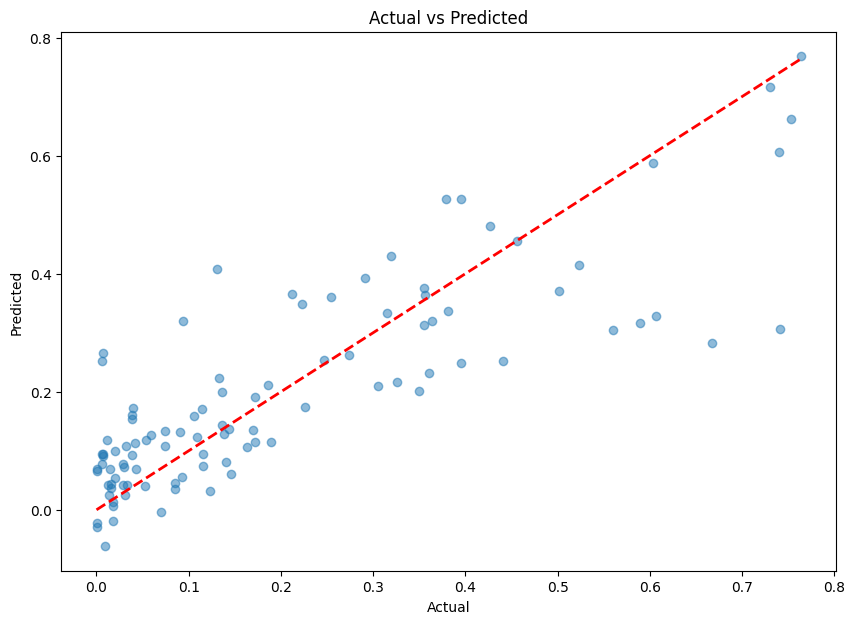

In [36]:
mse_lstm = mean_squared_error(y_test,predictions)
mae_lstm = mean_absolute_error(y_test,predictions)
r2_lstm = r2_score(y_test,predictions)

print(f"Mean Squared Error:",mse_lstm)
print(f"Mean Absolute Error:",mae_lstm)
print(f"R2 Score:",r2_lstm)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.scatter(y_test,predictions,alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--',lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

# Model Evaluation

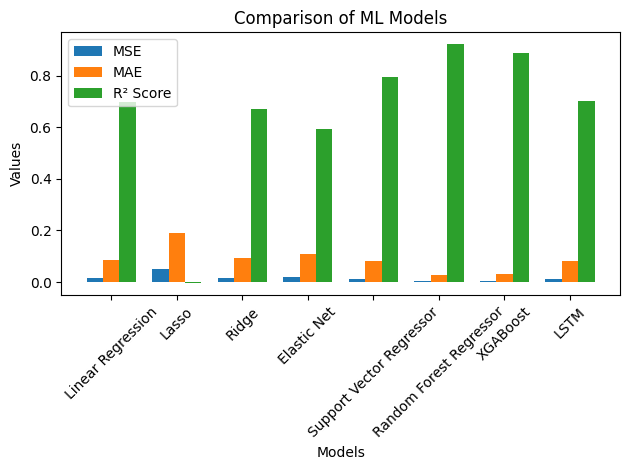

In [37]:
model_names = ['Linear Regression', 'Lasso', 'Ridge', 'Elastic Net', 'Support Vector Regressor', 'Random Forest Regressor', 'XGABoost', 'LSTM']
mse_values = [mse_lr,mse_lasso,mse_ridge,mse_elastic,mse_svr,mse_rfr,mse_xgb,mse_lstm]
mae_values = [mae_lr,mae_lasso,mae_ridge,mae_elastic,mae_svr,mae_rfr,mae_xgb,mae_lstm]
r2_scores = [r2_lr,r2_lasso,r2_ridge,r2_elastic,r2_svr,r2_rfr,r2_xgb,r2_lstm]

positions = np.arange(len(model_names))
width = 0.25

plt.bar(positions, mse_values, width=width, label='MSE', align='center')
plt.bar(positions + width, mae_values, width=width, label='MAE', align='center')
plt.bar(positions + 2 * width, r2_scores, width=width, label='R² Score', align='center')

plt.xlabel('Models')
plt.ylabel('Values')
plt.title('Comparison of ML Models')
plt.xticks(positions + width, model_names, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

# Exporting Trained Model

As we can See, XGABoost as outperformed all other models with Random Forest in the second place and 
So now Let's export out trained model to 

In [38]:
X.head()

State Name  State area   ( Km^2)  State Population  \
0    0.028571              0.476153          0.454715   
1    0.028571              0.476153          0.448904   
2    0.028571              0.476153          0.443118   
3    0.028571              0.476153          0.437356   
4    0.028571              0.476153          0.431619   

   Total Water Storage in Reservoirs(mcm)  Groundwater Level(mbgl)  \
0                                0.127063                 0.177567   
1                                0.119422                 0.175903   
2                                0.122640                 0.119321   
3                                0.125319                 0.106673   
4                                0.118027                 0.179730   

   Total Water Demand(BCM)  Rain Water(mm)  Population Density(per Km^2)  \
0                 0.613842        0.011458                      0.027351   
1                 0.607573        0.084075                      0.026994   
2                 0.601304        0.173169                      0.026639   
3                 0.595035        0.048931                      0.026285   
4                 0.588766        0.120932                      0.025933   

       Year  
0  1.000000  
1  0.923077  
2  0.846154  
3  0.769231  
4  0.692308

In [39]:
xgb_reg.predict([[0.28571,0.476153,0.437356,0.35559,0.231,0.821,0.156,0.026994]])

array([0.49639267], dtype=float32)

In [40]:
print(np.unique(X["State Name"].values))

[0.         0.02857143 0.05714286 0.08571429 0.11428571 0.14285714
 0.17142857 0.2        0.22857143 0.25714286 0.28571429 0.31428571
 0.34285714 0.37142857 0.4        0.42857143 0.45714286 0.48571429
 0.51428571 0.54285714 0.57142857 0.6        0.62857143 0.65714286
 0.68571429 0.71428571 0.74285714 0.77142857 0.8        0.82857143
 0.85714286 0.88571429 0.91428571 0.94285714 0.97142857 1.        ]


In [41]:
import joblib
joblib.dump(xgb_reg,"XGBoost_Model.joblib")

['XGBoost_Model.joblib']